<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/06_Vegetation_Indices_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Vegetation Indices**
<hr>

A vegetation index is a single value that quantifies vegetation health or structure. The math associated with calculating a vegetation index is derived from the physics of light reflection and absorption across bands. For instance, it is known that healthy vegetation reflects light strongly in the near infrared band and less strongly in the visible portion of the spectrum.

Thus, if you create a ratio between light reflected in the near infrared and light reflected in the visible spectrum, it will represent areas that potentially have healthy vegetation.


**Normalized Difference Vegetation Index (NDVI)**
<hr>

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of greenness ranging from 0-1 where 0 represents minimal or no greenness and 1 represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover and phenology (life cycle stage) over large areas.

**Normalized Difference Vegetation Index (NDVI)**
<hr>

The Normalized Difference Vegetation Index (NDVI) is a quantitative index of greenness ranging from 0-1 where 0 represents minimal or no greenness and 1 represents maximum greenness.

NDVI is often used for a quantitate proxy measure of vegetation health, cover and phenology (life cycle stage) over large areas.

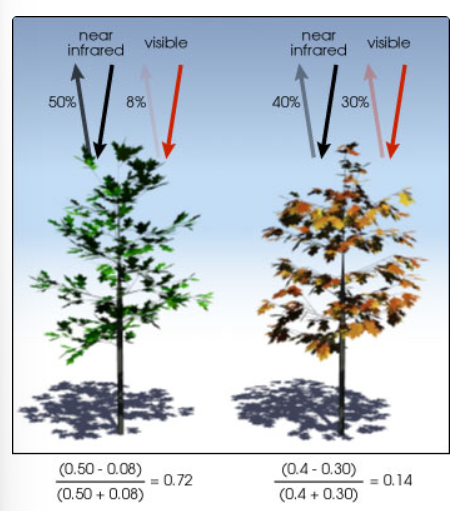

NDVI is calculated from the visible and near-infrared light reflected by vegetation. Healthy vegetation (left) absorbs most of the visible light that hits it, and reflects a large portion of near-infrared light. Unhealthy or sparse vegetation (right) reflects more visible light and less near-infrared light. Source: NASA

**How to Derive the NDVI Vegetation Index From Multispectral Imagery**
<hr>

The normalized difference vegetation index (NDVI) uses a ratio between near infrared and red light within the electromagnetic spectrum. To calculate NDVI you use the following formula where NIR is near infrared light and red represents red light. For your raster data, you will take the reflectance value in the red and near infrared bands to calculate the index.

`(NIR - Red) / (NIR + Red)`

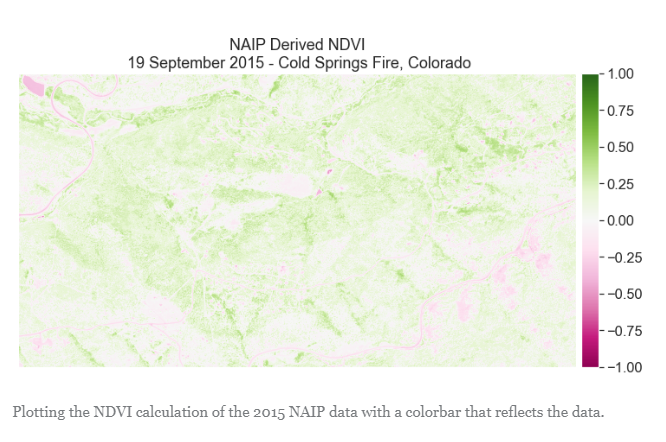

Normalized Burn Ratio (NBR)
The Normalized burn ratio (NBR) is used to identify burned areas. The formula is similar to a normalized difference vegetation index (NDVI), except that it uses near-infrared (NIR) and shortwave-infrared (SWIR) portions of the electromagnetic spectrum (Lopez, 1991; Key and Benson, 1995).

`NBR = (NIR - SWIR) / (NIR + SWIR)`

The normalized burn ratio (NBR) index uses the shortwave-infrared (SWIR) and near-infrared (NIR) portions of the electromagnetic spectrum.

The NIR and SWIR parts of the electromagnetic spectrum are a powerful combination of bands to use for this index given vegetation reflects strongly in the NIR region of the electromagnetic spectrum and weakly in the SWIR. Alternatively, it has been shown that a fire scar which contains scarred woody vegetation and earth will reflect more strongly in the SWIR part of the electromagnetic spectrum and beyond (see figure below).

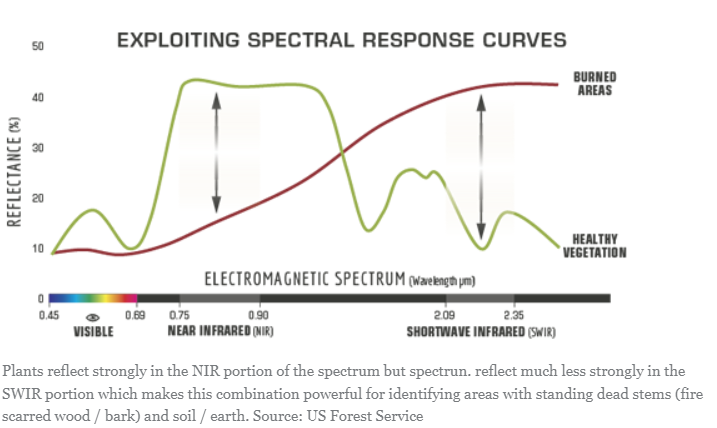

**NBR Bands**
The NBR index was originally developed for use with Landsat TM and ETM+ bands 4 and 7, but it will work with any multispectral sensor with a NIR band between **760 - 900 nm** and a SWIR band between **2080 - 2350 nm**. Thus this index can be used with both Landsat 8, MODIS and other multi (and hyper) spectral sensors.

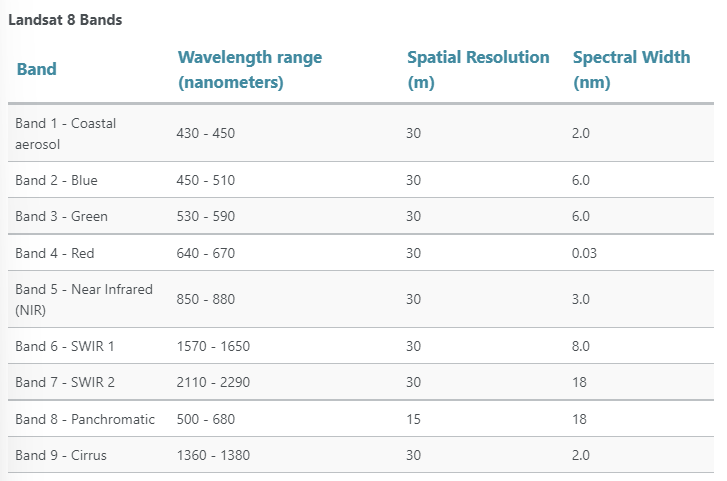

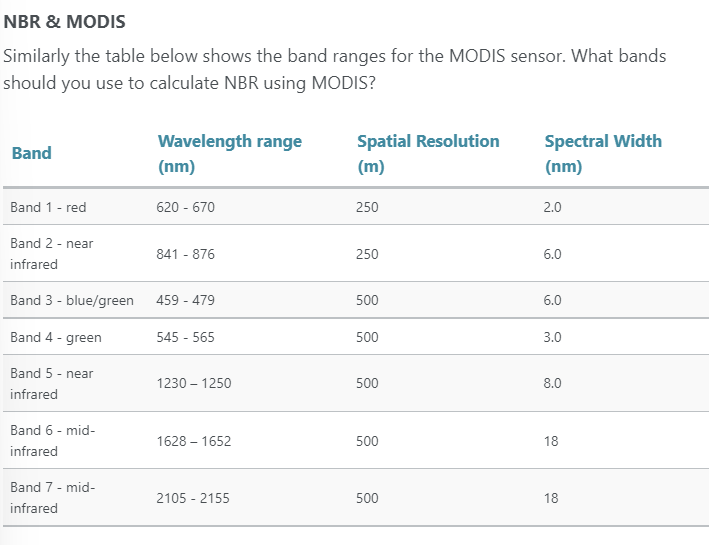

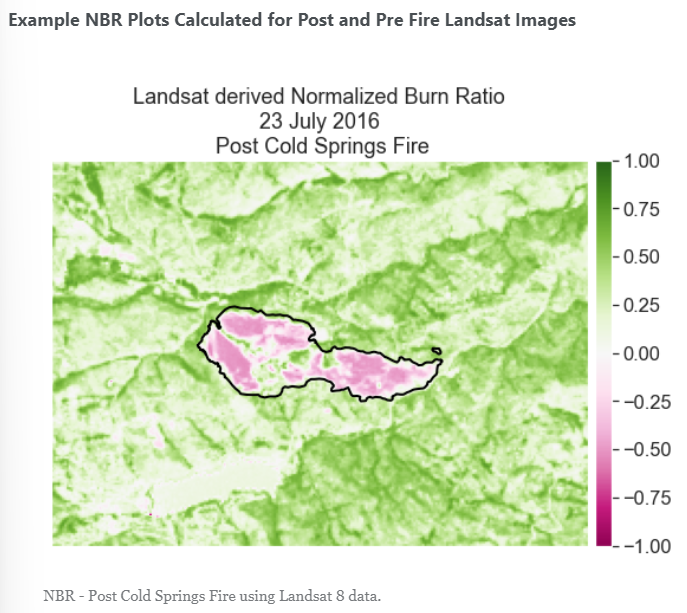

**Difference NBR**
<hr>

The Normalized Burn Ratio is most powerful as a tool to better understand fire extent and severity when used after calculating the difference between pre and post fire conditions. This difference is best measured using data collected immediately before the fire and then immediately after the fire. NBR is less effective if time has passed and vegetation regrowth / regeneration has begun after the fire. Once vegetation regeneration has begun, the fire scar will begin to reflect a stronger signal in the NIR portion of the spectrum because healthy plants reflect strongly in the NIR portion due to the properties of chlorophyll).

For this reason, the NBR ratio works better in areas like the United States where plant regeneration is expected to occur more slowly. In areas like the tropics which are wet and characterized by rapid regrowth, NBR may be less effective.

To calculate the difference NBR, you subtract the post-fire NBR raster from the pre-fire NBR raster as follows:

`dNBR = NBR(pre) - NBR(post)`

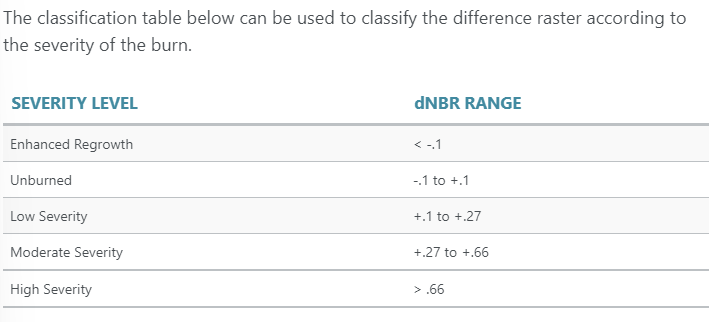

	 	> .66
**How Severe is Severe?**

It is important to keep in mind that that the classification table above is one quantitative interpretation of what the results of dNBR actually mean. The term “severity” is a qualitative term that could be quantified in different ways. For instance, who is to say that .5 couldn’t be representative of “high severity” vs .66?

As scientists, the best way to make sure your classification approaches represent what is actually happening on the ground in terms of fire severity is to check out the actual conditions on the ground. This process of confirming a value that you get from remote sensing data by checking it on the ground is called **validation**.

**NBR & Water - False Positives**

The NBR index can be a powerful tool to identify pixels that have a high likelyhood or being “burned”. However it is important to know that this index is also sensitive to water and thus sometimes, pixels that are classified as “high severity” may actually be water. Because of this, it is important to mask out areas of water PRIOR to performing any quantitative analysis on the difference NBR results.


### Calculate NDVI in Python

In [ ]:
!pip install rioxarray
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 12.6 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=2c8276368365a936723f882e02232989188bf263ad32f2ba04ad6f2b758ef529
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 19.8 MB/s 
     |████████████████████████████████| 16.7 MB 14.2 MB/s 


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Extracted output to /root/earth-analytics/data/cold-springs-fire/.


In [ ]:
# Open NAIP data
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)
naip_data.shape

(4, 2312, 4377)

Calculate NDVI using regular numpy array math. In this case, the bands you are subtracting come from the same data file. The tif file format requires that all layers are in the same CRS and of the same size so you assume the data line up. Thus you do not need to test the data for equal shape, crs and extent

In [ ]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

Finally plot the data. Note below that the vmin= and vmax= arguments are used to stretch the colorbar across the full possible range of NDVI values (-1 to 1).

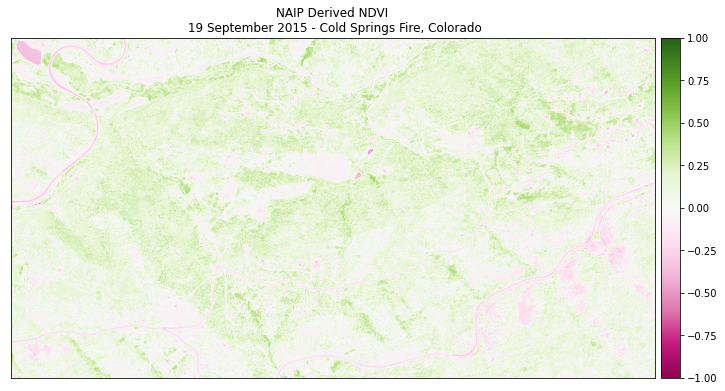

In [ ]:
ep.plot_bands(naip_ndvi,
              cmap="PiYG",
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")

plt.show()

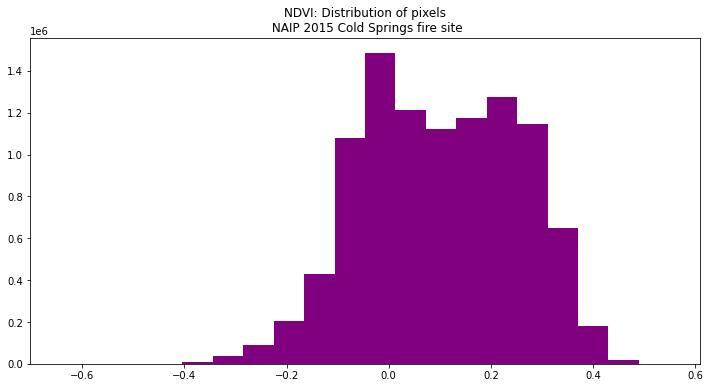

In [ ]:
# View the distribution of NDVI Values

ep.hist(naip_ndvi.values,
        figsize=(12,6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

**Optional - Export a Numpy Array to a Raster Geotiff in Python**
<hr>
When you are done, you can export your NDVI raster data so you could use them in QGIS or ArcGIS or share them with your colleagues. To do this, you use the   `xarray_name.rio.to_raster()` function.

You can view the type of data stored within the ndvi array using .dtype. Remember that the naip_ndvi object is a xarray DataArray.

In [ ]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

Note below that when we write the raster, we use the custom outpath that we make to write it out to a filename and location of our choice.

In [ ]:
naip_ndvi_custom_path = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

naip_ndvi.rio.to_raster(naip_ndvi_custom_path)

[USGS Remote Sensing Phenology](https://www.usgs.gov/special-topics/remote-sensing-phenology)

[NASA Earth Observatory - Vegetation Indices](https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php)

### Calculate dNBR Using Landsat Data

You calculate dNBR using the following steps:

1. Open up pre-fire data and calculate NBR
2. Open up the post-fire data and calculate NBR
3. Calculate dNBR (difference NBR) by subtracting post-fire NBR from pre-fire NBR (NBR pre - NBR post fire).
4. Classify the dNBR raster using the classification table.

In [ ]:
from glob import glob
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
import numpy.ma as ma
from shapely.geometry import mapping, box
from rasterio.plot import plotting_extent
import xarray as xr

# Prettier plotting with seaborn
sns.set_style('white')
sns.set(font_scale=1.5)

# Download data and set working directory
data1 = et.data.get_data('cold-springs-fire')
data2 = et.data.get_data('cs-test-landsat')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Extracted output to /root/earth-analytics/data/cs-test-landsat/.


To calculate difference Normalized Burn Ratio (dNBR), you first need to calculate NBR for the pre and post fire data. This, of course, presumes that you have data before and after the area was burned from the same remote sensing sensor. Ideally, this data also does not have clouds covering the fire area.


In [ ]:
def combine_tifs(tif_list):
  """A function that combines a list of tifs in the same CRS
  and of the same extent into an xarray object

  Parameters
  ----------
  tif_list : list
      A list of paths to the tif files that you wish to combine.

  Returns
  -------
  An xarray object with all of the tif files in the listmerged into
  a single object.
  """

  out_xr= []
  for i, tif_path in enumerate(tif_list):
    out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
    out_xr[i]["band"] = i+1

  return xr.concat(out_xr, dim="band")

In [ ]:
# Import and stack post fire Landsat data - notice you are only stacking bands 5-7
all_landsat_bands_path = glob(os.path.join("cold-springs-fire",
                                           "landsat_collect",
                                           "LC080340322016072301T1-SC20180214145802",
                                           "crop",
                                           "*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_post_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(
    landsat_post_fire[0].values, landsat_post_fire.rio.transform())

landsat_post_fire

<xarray.DataArray (band: 3, y: 177, x: 246)>
array([[[2445., 2271., 2417., ..., 1734., 1904., 2101.],
        [2662., 2465., 2532., ..., 1736., 1824., 2165.],
        [2880., 2872., 2750., ..., 1897., 2116., 2300.],
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  5571
    STATISTICS_MEAN:     1958.570001378
    STATISTICS_MINIMUM:  -2
    STATISTICS_STDDEV:   557.005903918
    scale_factor:        1.0
    add_offset:          0.0

In [ ]:
# Open fire boundary layer and reproject it to match the Landsat data
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# If the CRS are not the same, be sure to reproject
fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

Next, you can calculate NBR on the post fire data. Remember that NBR uses different bands than NDVI but the calculation formula is the same. For landsat 8 data you will be using bands 7 and 5. And remember because python starts counting at 0 (0-based indexing), and we got just bands 5, 6, 7 in our xarray, that will be indices 2 and 0 when you access them in your numpy array.

Below raster math is used to calculate normalized difference.

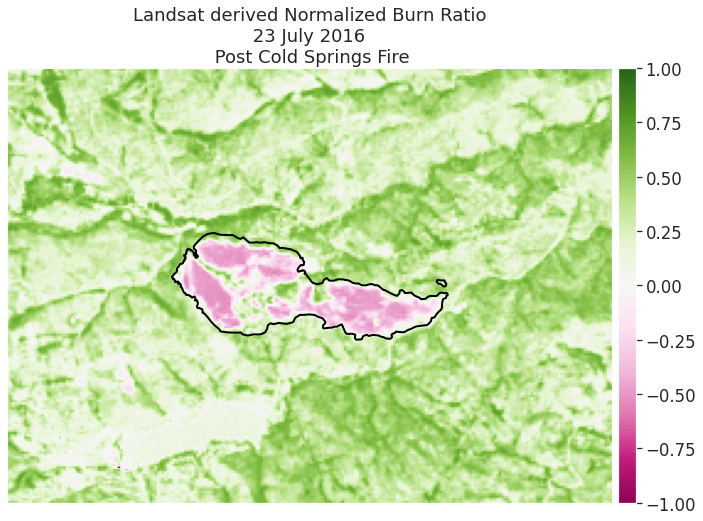

In [ ]:
# Calculate NBR & plot
landsat_postfire_nbr = (
    landsat_post_fire[0]-landsat_post_fire[2])/ (landsat_post_fire[0]+landsat_post_fire[2])


fig, ax = plt.subplots(figsize=(15,8))

ep.plot_bands(landsat_postfire_nbr,
              cmap="PiYG",
              vmin=-1,
              vmax=1,
              ax=ax,
              extent=extent_landsat,
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire")

fire_bound_utmz13.plot(ax=ax,
                       color="None",
                       edgecolor="black",
                       linewidth=2)

plt.show()

<small>Normalized burn ratio (NBR) calculated for the post-Cold Springs fire image for July 23, 2016 from Landsat.

Next, calculate NBR for the pre-fire data. Note that you will have to download the data that is being used below from Earth Explorer following the lessons in this tutorial series.

Also note that you will need to clip or crop the data so that you can subtract the post fire data from the pre fire data. The code to do this is hidden but you did this last week so you should know what to do!

In [ ]:
def open_clean_band(band_path, crop_layer=None):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    crop_layer : geopandas geodataframe
        A geodataframe containing the clip extent of interest. NOTE: this will
        fail if the clip extent is in a different CRS than the raster data.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    if crop_layer is not None:
        try:
            clip_bound = crop_layer.geometry
            cleaned_band = rxr.open_rasterio(band_path,
                                             masked=True).rio.clip(clip_bound,
                                                                   from_disk=True).squeeze()
        except Exception as err:
            print("Oops, I need a geodataframe object for this to work.")
            print(err)

    else:
        cleaned_band = rxr.open_rasterio(band_path,
                                     masked=True).squeeze()

    return cleaned_band


def process_bands(paths, crop_layer=None, stack=False):
    """
    Open, clean and crop a list of raster files using rioxarray.

    Parameters
    ----------
    paths : list
        A list of paths to raster files that could be stacked (of the same
        resolution, crs and spatial extent).

    crop_layer : geodataframe
        A geodataframe containing the crop geometry that you wish to crop your
        data to.

    stack : boolean
        If True, return a stacked xarray object. If false will return a list
        of xarray objects.

    Returns
    -------
        Either a list of xarray objects or a stacked xarray object
    """

    all_bands = []
    for i, aband in enumerate(paths):
        cleaned = open_clean_band(aband, crop_layer)
        cleaned["band"] = i+1
        all_bands.append(cleaned)

    if stack:
        print("I'm stacking your data now.")
        return xr.concat(all_bands, dim="band")
    else:
        print("Returning a list of xarray objects.")
        return all_bands

In [ ]:
# Open pre fire Landsat data
landsat_dirpath_pre = os.path.join("cold-springs-fire",
                                   "landsat_collect",
                                   "LC080340322016070701T1-SC20180214145604",
                                   "crop",
                                   "*band[5-7]*.tif")

landsat_paths_pre = sorted(glob(landsat_dirpath_pre))

landsat_pre = process_bands(landsat_paths_pre, stack=True)
landsat_pre

I'm stacking your data now.


<xarray.DataArray (band: 3, y: 177, x: 246)>
array([[[2080., 1942., 1950., ..., 1748., 1802., 2135.],
        [2300., 2045., 1939., ..., 1716., 1783., 2131.],
        [2582., 2443., 2347., ..., 1836., 2002., 2241.],
        ...,
        [2076., 1993., 2145., ..., 1914., 2066., 2166.],
        [1910., 1899., 1962., ..., 1787., 2038., 2300.],
        [1633., 1611., 1738., ..., 1714., 1848., 2194.]],

       [[2083., 1985., 1927., ..., 1011., 1151., 1251.],
        [1896., 1932., 1845., ..., 1130., 1240., 1505.],
        [1887., 1771., 1672., ..., 1283., 1561., 1793.],
        ...,
        [1942., 1683., 1885., ..., 1589., 1539., 1608.],
        [1865., 1850., 1572., ..., 1553., 1507., 1560.],
        [1199.,  994., 1113., ..., 1656., 1665., 1715.]],

       [[1443., 1387., 1283., ...,  576.,  675.,  696.],
        [1198., 1274., 1183., ...,  657.,  738.,  907.],
        [1108., 1036.,  983., ...,  759.,  949., 1147.],
        ...,
        [1541., 1244., 1359., ..., 1012.,  919.,  989.],
        [1375., 1602., 1245., ..., 1002.,  942.,  929.],
        [ 894.,  619.,  693., ..., 1058., 1044., 1056.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  9962
    STATISTICS_MEAN:     2232.457236691
    STATISTICS_MINIMUM:  57
    STATISTICS_STDDEV:   1266.0875250873
    scale_factor:        1.0
    add_offset:          0.0

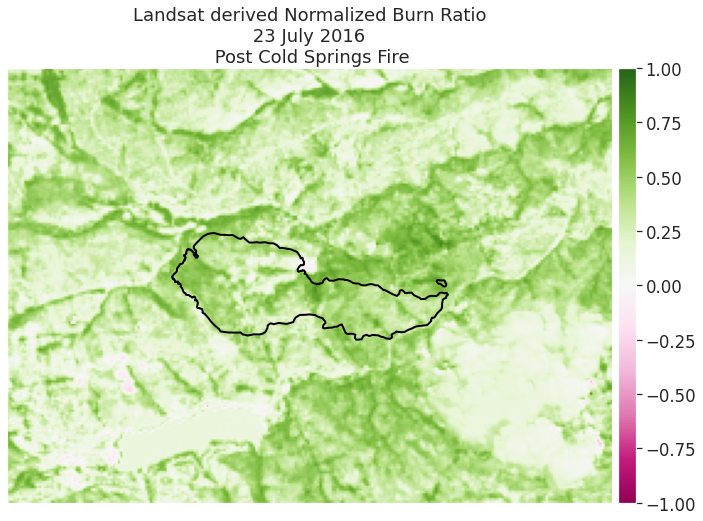

In [ ]:
# Calculate NBR & plot
landsat_prefire_nbr = (
    landsat_pre[0]-landsat_pre[2]) / (landsat_pre[0]+landsat_pre[2])

fig, ax = plt.subplots(figsize=(15, 8))

ep.plot_bands(landsat_prefire_nbr,
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              ax=ax,
              extent=extent_landsat,
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire")

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)
plt.show()

In [ ]:
dnbr_landsat = landsat_prefire_nbr - landsat_postfire_nbr
dnbr_landsat

<xarray.DataArray (y: 177, x: 246)>
array([[ 0.06053689,  0.09801085,  0.13565655, ..., -0.02277768,
        -0.03019354,  0.00112736],
       [ 0.03737938,  0.09320462,  0.11856693, ..., -0.00827491,
        -0.00438508,  0.00114849],
       [ 0.00139973,  0.06205684,  0.08142802, ..., -0.00807688,
         0.00647721,  0.00447503],
       ...,
       [-0.07159956, -0.00260067,  0.02915099, ..., -0.01685438,
         0.02431214,  0.03168178],
       [ 0.08337121, -0.14558633, -0.07208158, ..., -0.03929183,
        -0.02250457, -0.01183644],
       [-0.111083  ,  0.02821738, -0.00633484, ...,  0.00962946,
        -0.02222264, -0.03099948]], dtype=float32)
Coordinates:
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 0

Finally you can classify the data. Remember that dNBR has a set of classification bins and associated categories that are commonly used. When you have calculated NBR - classify the output raster using the `np.digitize()`function. Use the dNBR classes below.

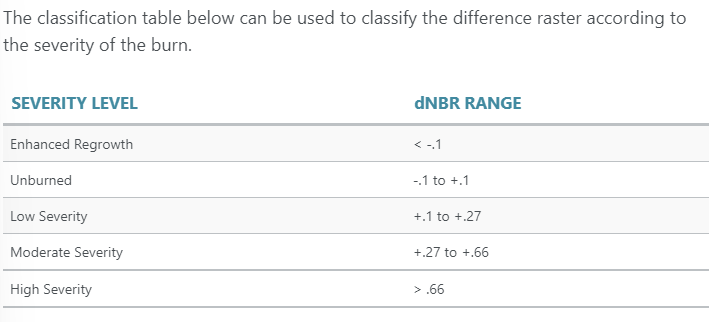

NOTE: your min and max values for NBR may be slightly different from the table shown above. In the code example above, `np.inf` is used to indicate any values larger than `.66`.

In [ ]:
# Define dNBR classification bins
dnbr_class_bins = [-np.inf, -.1, .1, .27, .66, np.inf]

# dnbr_landsat_class = np.digitize(dnbr_landsat, dnbr_class_bins)
dnbr_landsat_class = xr.apply_ufunc(np.digitize,
                                    dnbr_landsat,
                                    dnbr_class_bins)
dnbr_landsat_class

<xarray.DataArray (y: 177, x: 246)>
array([[2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 1, 2, ..., 2, 2, 2],
       [1, 2, 2, ..., 2, 2, 2]])
Coordinates:
  * x            (x) float64 4.557e+05 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 0

Finally you are ready to plot your data. Note that legends in python can be tricky so you are provided with two legend options below. In the first plot, you create a legend with individual boxes. Creating a legend this way forces you to use matplotlib patches. Effectively you are drawing each box to create a legend from colors you’ve used in your image.

In [ ]:
dnbr_cat_names = ["Enhanced Regrowth",
                  "Unburned",
                  "Low Severity",
                  "Moderate Severity",
                  "High Severity"]

nbr_colors = ["g",
              "yellowgreen",
              "peachpuff",
              "coral",
              "maroon"]
nbr_cmap = ListedColormap(nbr_colors)

Classes:  [1, 2, 3, 4, 5]


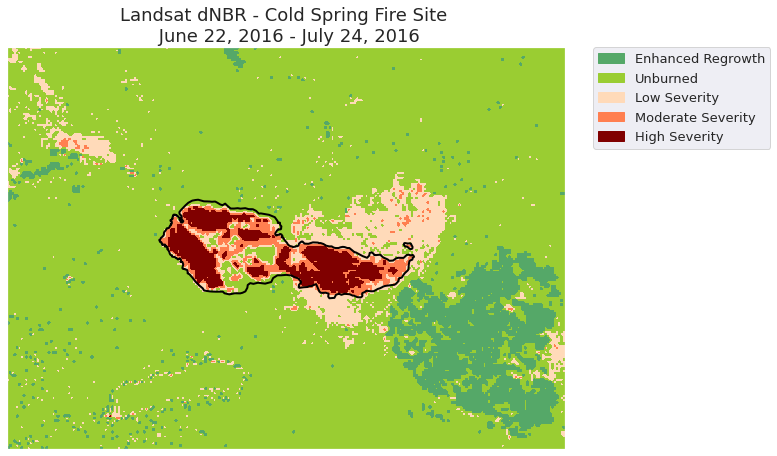

In [ ]:
# Plot the data with a custom legend
dnbr_landsat_class_plot = ma.masked_array(
    dnbr_landsat_class.values, dnbr_landsat_class.isnull())

fig, ax = plt.subplots(figsize=(10, 8))

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)

classes = np.unique(dnbr_landsat_class_plot)
classes = classes.tolist()[:5]
print("Classes: ", classes)

ep.plot_bands(dnbr_landsat_class_plot,
              cmap=nbr_cmap,
              vmin=1,
              vmax=5,
              title="Landsat dNBR - Cold Spring Fire Site \n June 22, 2016 - July 24, 2016",
              cbar=False,
              scale=False,
              extent=extent_landsat,
              ax=ax)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes,
               titles=dnbr_cat_names)

plt.show()

**Create a Colorbar Legend - BONUS!**

You can also create a discrete colorbar with labels. This method might be a bit less technical to follow. You can decide what type of legend you prefer for your homework.

In [ ]:
# Grab raster unique values (classes)
values = np.unique(dnbr_landsat_class).tolist()

# Add another index value because for n categories
# you need n+1 values to create bins
values = [0] + values

# Make a color map of fixed colors
nbr_colors = ["g", "yellowgreen", "peachpuff", "coral", "maroon"]
nbr_cmap = ListedColormap(nbr_colors)

# But the goal is the identify the MIDDLE point
# of each bin to create a centered tick
bounds = [((a + b) / 2) for a, b in zip(values[:-1], values[1::1])] + [5.5]

# Define normalization
norm = colors.BoundaryNorm(bounds, nbr_cmap.N)

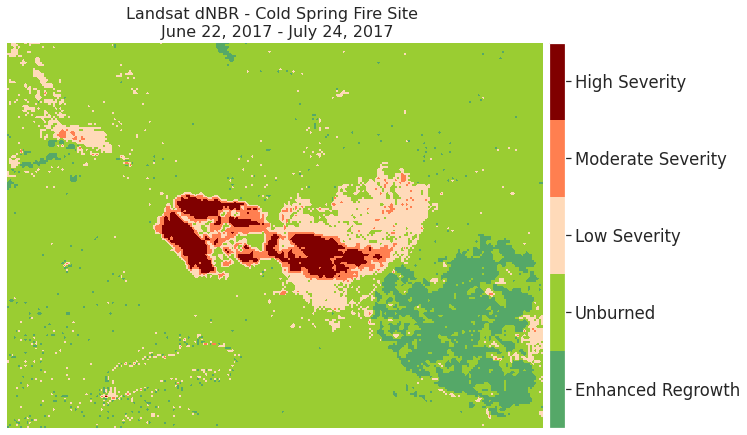

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))

ep.plot_bands(dnbr_landsat_class,
              ax=ax,
              cmap=nbr_cmap,
              norm=norm,
              cbar=False)

cbar = ep.colorbar(ax.get_images()[0])

cbar.set_ticks([np.unique(dnbr_landsat_class)])
cbar.set_ticklabels(dnbr_cat_names)
ax.set_title("Landsat dNBR - Cold Spring Fire Site \n June 22, 2017 - July 24, 2017",
             fontsize=16)

# Turn off ticks
ax.set_axis_off()
plt.show()